In [1]:
# STEP 1: Install and import the program
#
# clone the repo to your local directory
# navigate to the \bifacialvf directory which contains setup
# run pip install -e .

import bifacialvf    
import os
# change directory to \bifacialvf\ root
os.chdir(os.path.dirname(bifacialvf.__file__))
%pwd

u'/Users/eleonorakiziv/Desktop/bifacialvf-master/bifacialvf'

In [2]:
#2. Set the Values of your test
# Remember all values are normalized to your panel length (slope, which will equal 1).
# If your slope is different than 1 m, desired C and rtr (or D) will need to be 
# divided by the slope length.
# i.e.: panel 1mx1.59m, in portrait mode means slope = 1.59. For a height C of 1m, C = 1/1.59. 
#         For a rtr of 1.5m, D=0.51519/1.59 if beta tilt angle = 10 

# Set mandatory variables
beta =                    # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg)
C = 1                      # GroundClearance(panel slope lengths)
rtr = 1.5              # row to row spacing in panel lengths. 
GCR = 1.0/rtr             # Ground Cover Ratio

TMYtoread = "data/724010TYA.csv"   # VA Richmond
writefiletitle = "data/Output/test.csv"

# Set optional variables.  These are the default values
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
albedo = 0.62               # ground albedo beneath system
# 1-axis tracking instructions (optional)
tracking=False
backtrack=True       # backtracking optimization as defined in pvlib

In [3]:
bifacialvf.simulate(TMYtoread, writefiletitle, beta, sazm, 
                C=C, rtr=rtr, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=tracking, backtrack=backtrack, )

 
********* 
Running Simulation for TMY3:  data/724010TYA.csv
Location:   "RICHMOND INTERNATIONAL AP"
Lat:  37.517  Long:  -77.317  Tz  -5.0
Parameters: beta:  10   Sazm:  180   Height:  1   rtr separation:  1.5   Row type:  interior   Albedo:  0.62
Saving into data/Output/test.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.451624382235
Actual distance between rows =  0.515192246988
 
Finished


In [4]:
#4. Load the results from the resultfile
from loadVFresults import loadVFresults
(data, metadata) = loadVFresults(writefiletitle)
print data.keys()
# calculate average front and back global tilted irradiance across the module chord
data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

# Print the annual bifacial ratio
frontIrrSum = data['GTIFrontavg'].sum()
backIrrSum = data['GTIBackavg'].sum()
print('The bifacial ratio for ground clearance {} and rtr spacing {} is: {:.1f}%'.format(C,rtr,backIrrSum/frontIrrSum*100))

Index([u'Year', u'Month', u'Day', u'Hour', u'Minute', u'DNI', u'DHI',
       u'decHRs', u'ghi', u'inc', u'zen', u'azm', u'pvFrontSH',
       u'aveFrontGroundGHI', u'GTIfrontBroadBand', u'pvBackSH',
       u'aveBackGroundGHI', u'GTIbackBroadBand', u'maxShadow', u'Tamb',
       u'Vwind', u'No_1_RowFrontGTI', u'No_2_RowFrontGTI', u'No_3_RowFrontGTI',
       u'No_4_RowFrontGTI', u'No_5_RowFrontGTI', u'No_6_RowFrontGTI',
       u'No_1_RowBackGTI', u'No_2_RowBackGTI', u'No_3_RowBackGTI',
       u'No_4_RowBackGTI', u'No_5_RowBackGTI', u'No_6_RowBackGTI'],
      dtype='object')
The bifacial ratio for ground clearance 1 and rtr spacing 1.5 is: 16.3%


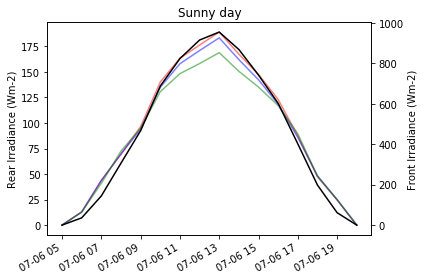

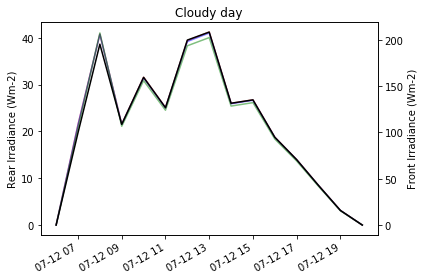

In [5]:
# plot the rear irradiance distribution for a single point in time. 1999-07-06
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# what is measdatetime? 
data['GTIBackstd'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].std(axis=1)
data['measdatetime'] = pd.to_datetime(data[['Year', 'Month', 'Day','Hour','Minute']])
singleday = (data['measdatetime'] > '1999-07-06') & (data['measdatetime']<'1999-07-07')
singleday2 = (data['measdatetime'] > '1999-07-12') & (data['measdatetime']<'1999-07-13')

fig, ax = plt.subplots() # Create a figure and a set of subplots. Return fig object and ax : Axes object or array of Axes objects.
ax1 = ax.twinx() #Create a twin Axes sharing the xaxis
ax1.plot(data['measdatetime'][singleday],data['GTIFrontavg'][singleday],'k')
ax1.set_ylabel('Front Irradiance (Wm-2)')
ax.set_ylabel('Rear Irradiance (Wm-2)')
ax.plot(data['measdatetime'][singleday], data['No_1_RowBackGTI'][singleday],'r' , alpha =0.5)
ax.plot(data['measdatetime'][singleday], data['No_2_RowBackGTI'][singleday], 'b', alpha = 0.5)
ax.plot(data['measdatetime'][singleday], data['No_6_RowBackGTI'][singleday], 'g', alpha = 0.5)
ax.set_title('Sunny day')
fig.autofmt_xdate()
fig.tight_layout()


fig2, ax2 = plt.subplots()
ax3 = ax2.twinx()
ax3.plot(data['measdatetime'][singleday2],data['GTIFrontavg'][singleday2],'k')
ax3.set_ylabel('Front Irradiance (Wm-2)')
ax2.set_ylabel('Rear Irradiance (Wm-2)')
ax2.plot(data['measdatetime'][singleday2], data['No_1_RowBackGTI'][singleday2],'r' , alpha =0.5)
ax2.plot(data['measdatetime'][singleday2], data['No_2_RowBackGTI'][singleday2], 'b', alpha = 0.5)
ax2.plot(data['measdatetime'][singleday2], data['No_6_RowBackGTI'][singleday2], 'g', alpha = 0.5)
ax2.set_title('Cloudy day')
fig2.autofmt_xdate()
fig2.tight_layout()